## check if PSE step has anticipated growth

In [1]:
# view jupyter notebook wide screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

#### read in q and qp1 and plot

q =  [ 0.        +0.j          0.00583793-0.0223642j   0.0161292 -0.0328297j
 ... -0.00620154+0.00716634j -0.00619246+0.00714909j
 -0.00622858+0.00718993j]
shape =  (2424,)
q =  [ 0.00000e+00+0.00000e+00j  5.83791e-03-2.23644e-02j
  1.61291e-02-3.28295e-02j ... -6.20156e-03+7.16645e-03j
 -6.19245e-03+7.14880e-03j  1.84279e-07+2.07081e-08j]
shape =  (2424,)
q =  [ 0.00000e+00+0.00000e+00j -2.97326e-15+1.62975e-14j
 -1.53141e-15+1.18740e-14j ...  4.90000e-14-4.87482e-14j
  8.11251e-14-1.41936e-13j -1.51407e-14+1.15134e-14j]
shape =  (2424,)


<IPython.core.display.Javascript object>


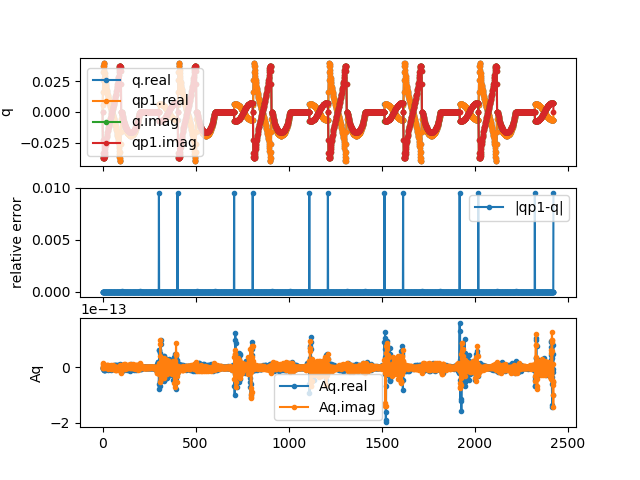

In [37]:
# read in data
fname_q='../PSE/printVecq.txt'
fname_qp1='../PSE/printVecqp1.txt'
def read_q(fname_q):
    q = np.genfromtxt(fname_q, delimiter=',',dtype=str)
    todelete=[]
    for i in range(q.size):
        # remove various lines that match
        if 'Vec' in q[i]:
            todelete.append(i)
        if 'type' in q[i]:
            todelete.append(i)
        if 'Process' in q[i]:
            todelete.append(i)
        # get rid of whitespace and change i to j
        q[i] = q[i].replace(' ','').replace('i','j')
    q=np.delete(q,todelete)
    q = q.astype(complex)
    print('q = ',q)
    print('shape = ',q.shape)
    return q
q = read_q(fname_q)
qp1 = read_q(fname_qp1)
Aq = read_q('../PSE/Aq.txt')

# plot q
fig,ax=plt.subplots(nrows=3,sharex=True)
ax[0].plot((q.real),'.-',label='q.real')
ax[0].plot((qp1.real),'.-',label='qp1.real')
ax[0].plot((q.imag),'.-',label='q.imag')
ax[0].plot((qp1.imag),'.-',label='qp1.imag')
#ax[0].plot(np.abs(q_ansatz),label='q_ansatz')
ax[0].set_ylabel('q')
ax[0].legend(loc='best',numpoints=1)
fig.show()

# plot error
ax[1].plot(np.abs(qp1-q),'.-',label='|qp1-q|')
ax[1].set_ylabel('relative error')
ax[1].legend(loc='best',numpoints=1)

# plot Aq
ax[2].plot(Aq.real,'.-',label='Aq.real')
ax[2].plot(Aq.imag,'.-',label='Aq.imag')
ax[2].set_ylabel('Aq')
ax[2].legend(loc='best',numpoints=1)
fig.show()

#### calc anticipated qp1

In [6]:
# calc q's from ansatz
def ansatz(q,alpha,x,omega,t):
    return q*np.exp(1.j*(alpha*x-omega*t))
alpha=1.026869 - 8.454123e-4j
x=0.001
omega=0.27
t=0.

q_ansatz = ansatz(q,alpha,x,omega,t)
print(q_ansatz)

[ 0.        +0.j         -0.00077279-0.00919958j  0.00064675-0.01628756j
 ... -0.00325207+0.00584651j -0.0032528 +0.00584169j
 -0.00325594+0.00585538j]


### Check Taylor Series expansions and order of accuracy

In [ ]:
from IPython.core.display import display, HTML

In [ ]:
# taylor series check
from sympy import *
x, h = symbols('x, h')
f = Function('f')
from IPython.display import display
init_printing()
def ft(x,h):
    return sum(h**i/factorial(i) * f(x).diff(x, i) for i in range(11))

# Check second order accurate central diff
print( 'central 2nd diff 2nd order')
display(
    (
        ft(x,-h) 
        - 2*ft(x,0) 
        + ft(x,h)
    )/h**2)

# check central 4th order second derivative
print( 'central 2nd diff 4th order')
display(
    (
        -1*ft(x,-2*h) 
        +16 *ft(x,-h)
        -30 *ft(x,0) 
        +16 *ft(x,h) 
        -ft(x,2 *h)
    )/(12 *h**2))

# check shifted 4th order 2nd derivative
print( 'shifted 2nd diff 4th order')
display(
    (
         10 *ft(x,-1*h)
        -15 *ft(x,0   )
        -4  *ft(x,h   )
        +14 *ft(x,2*h ) 
        -6  *ft(x,3*h ) 
        +1  *ft(x,4*h ) 
    )/(12 *h**2))

# check central 4th order 4th derivative
print( 'central 4th diff 4th order')
display(
    (
        -1  *ft(x,-3*h)
        +12 *ft(x,-2*h)
        -39 *ft(x,-h  )
        +56 *ft(x,0*h ) 
        -39 *ft(x,h   ) 
        +12 *ft(x,2*h ) 
        -1  *ft(x,3*h )
    )/(6*h**4))

# check shifted 4th order 4th derivative
print( 'shifted 4th diff 4th order')
display(
    (
         21 *ft(x,-1*h)
        -112*ft(x,0   )
        +255*ft(x,h   )
        -324*ft(x,2*h ) 
        +251*ft(x,3*h ) 
        -120*ft(x,4*h ) 
        +33 *ft(x,5*h )
        -4  *ft(x,6*h )
    )/(6*h**4))

# check shifted 4th order 4th derivative
print('shifted 4th diff 4th order')
display(
    (
         4  *ft(x,-2*h)
        -11 *ft(x,-1*h)
        +0  *ft(x,0   )
        +31 *ft(x,h   )
        -44 *ft(x,2*h ) 
        +27 *ft(x,3*h ) 
        -8  *ft(x,4*h ) 
        +1  *ft(x,5*h )
    )/(6 *h**4))



### old useless code

In [ ]:
def set_D2(y,order=2):
    '''
    Input:
        y: array of y values of channel
    Output:
        D2: Second derivative of order O(h^2) or what specifide assuming uniform y spacing
    '''
    n = y.size
    h=y[1]-y[0]
    ones=np.ones(n)
    I=np.eye(n)
    # get coefficients for main diagonals
    d=2
    N=order+d # how many pts needed for order of accuracy
    if N>n:
        raise ValueError('You need more points in your domain, you need %i pts and you only gave %i'%(N,n))
    Nm1=N-1 # how many pts needed if using central difference is equal to N-1
    # stencil and get Coeffs for diagonals
    s = np.arange(Nm1)-(Nm1-1)/2 # stencil for central diff of order
    smax=s[-1] # right most stencil used (positive range)
    Coeffs = get_D_Coeffs(s,d=d)
    # loop over s and add coefficient matrices to D2
    D2 = np.zeros_like(I)
    si = np.nditer(s,('c_index',))
    while not si.finished:
        i = si.index
        if si[0]==0:
            diag_to_add = np.diag(Coeffs[i] * ones,k=si[0])
        else:
            diag_to_add = np.diag(Coeffs[i] * ones[:-abs(si[0])],k=si[0])

        D2 += diag_to_add
        si.iternext()
    # alter BC so we don't go out of range on bottom of channel
    for i in range(1,smax):
        # for ith row, set proper stencil coefficients
        s = np.arange(N)-i # stencil for shifted diff of order
        Coeffs = get_D_Coeffs(s,d=d)
        D2[i,:] = 0. # set row to zero
        D2[i,s+i] = Coeffs # set row to have proper coefficients

        # for -ith-1 row, set proper stencil coefficients
        s = -(np.arange(N)-i) # stencil for shifted diff of order
        Coeffs = get_D_Coeffs(s,d=d)
        D2[-i-1,:] = 0. # set row to zero
        D2[-i-1,s-i-1] = Coeffs # set row to have proper coefficients

    return (1./(h**2)) * D2[1:-1,:] # do not return the top or bottom row
def set_D4(y,order=2):
    '''
    Input:
        y: array of y values of channel
    Output:
        D4: Fourth derivative of order O(h^2) or what is specified assuming uniform y spacing and D1(y)=0 at walls
    '''
    h = y[1]-y[0] # uniform spacing
    n = y.size
    ones=np.ones(n)
    I = np.eye(n)
    # get coefficients for main diagonals
    d=4
    N=order+d # how many pts needed for order of accuracy
    if N>n:
        raise ValueError('You need more points in your domain, you need %i pts and you only gave %i'%(N,n))
    Nm1=N-1 # how many pts needed if using central difference is equal to N-1
    # stencil and get Coeffs for diagonals
    s = np.arange(Nm1)-(Nm1-1)/2 # stencil for central diff of order
    smax=s[-1] # right most stencil used (positive range)
    Coeffs = get_D_Coeffs(s,d=d)
    # loop over s and add coefficient matrices to D4
    D4 = np.zeros_like(I)
    si = np.nditer(s,('c_index',))
    while not si.finished:
        i = si.index
        if si[0]==0:
            diag_to_add = np.diag(Coeffs[i] * ones,k=si[0])
        else:
            diag_to_add = np.diag(Coeffs[i] * ones[:-abs(si[0])],k=si[0])

        D4 += diag_to_add
        si.iternext()
    # alter BC so we don't go out of range on bottom of channel
    for i in range(1,smax):
        # for ith row, set proper stencil coefficients
        s = np.arange(N)-i # stencil for shifted diff of order
        Coeffs = get_D_Coeffs(s,d=d)
        D4[i,:] = 0. # set row to zero
        D4[i,s+i] = Coeffs # set row to have proper coefficients

        # for -ith-1 row, set proper stencil coefficients
        s = -(np.arange(N)-i) # stencil for shifted diff of order
        Coeffs = get_D_Coeffs(s,d=d)
        D4[-i-1,:] = 0. # set row to zero
        D4[-i-1,s-i-1] = Coeffs # set row to have proper coefficients

    return (1./(h**4)) * D4[1:-1,:] # do not return the top or bottom row

## Solve using primitive variables, but while using $\nabla^2$ in each equation


In [ ]:
# functions for primitive formulation u,v,w,P
def set_BCs_primitive_lap(y, Aus, Bus, Avs, Bvs, Aws, Bws, Acons, Bcons, order=2,large_multiple=0.):
    '''
    Set boundary condition values to As, Bs
    Modifies the (n-2 X n) matrices to be (n X n)
    Sets first/last row of Aos, Bos to have the BC v'=0 at walls
    Adds first/last rows to all matrices to have v=eta=0 at walls
    
    Inputs:
        y: y spactial array 
        Aus: List of [Auu, Auv, Auw, Aup]
        Bus: List of [Buu, Buv, Buw, Bup]
        Avs: List of [Avu, Avv, Avw, Avp]
        Bvs: List of [Bvu, Bvv, Bvw, Bvp]
        Aws: List of [Awu, Awv, Aww, Awp]
        Bws: List of [Bwu, Bwv, Bww, Bwp]
        Acons: List of [Aconu, Aconv, Aconw, Aconp]
        Bcons: List of [Bconu, Bconv, Bconw, Bconp]
        order: order of derivative (O(h^order))
        large_multiple: used to set RHS to nonzero and kill spurious eigenmodes
    '''
    h=y[1]-y[0]
    # v'=0 at walls
    # alter first and last line of As and Bs to contain u'=v'=w'=0 BC
    d=1 # derivative
    N=order+d # how many pts needed for order of accuracy
    s = np.arange(N) # stencil for shifted diff of order for i=0
    sn = -1*np.arange(N) # stencil for shifted diff of order for i=-1
    Coeffs = get_D_Coeffs(s,d=d)
    Coeffsn = get_D_Coeffs(sn,d=d)
    # set u-mom u'=0 at walls
    for i in range(len(Aus)):
        Aus[i][(0,-1),:] = 0.
        Bus[i][(0,-1),:] = 0.
        if i==0:
            Aus[i][0,s] = Coeffs
            Bus[i][0,s] = large_multiple*Coeffs
            Aus[i][-1,sn-1] = Coeffsn
            Bus[i][-1,sn-1] = large_multiple*Coeffsn
    # set v-mom v'=0 at walls
    for i in range(len(Avs)):
        Avs[i][(0,-1),:] = 0.
        Bvs[i][(0,-1),:] = 0.
        if i==1:
            Avs[i][0,s] = Coeffs
            Bvs[i][0,s] = large_multiple*Coeffs
            Avs[i][-1,sn-1] = Coeffsn
            Bvs[i][-1,sn-1] = large_multiple*Coeffsn
            
    # set w-mom w'=0 at walls
    for i in range(len(Aws)):
        Aws[i][(0,-1),:] = 0.
        Bws[i][(0,-1),:] = 0.
        if i==2:
            Aws[i][0,s] = Coeffs
            Bws[i][0,s] = large_multiple*Coeffs
            Aws[i][-1,sn-1] = Coeffsn
            Bws[i][-1,sn-1] = large_multiple*Coeffsn
            
    # v=0 at walls
    # rows to add to As and Bs at top and bottom
    zero_row = np.zeros((1,Aus[0][0,:].size))
    v0_at_bottom = np.copy(zero_row)
    v0_at_bottom[0,0] = 1.
    v0_at_top = np.copy(zero_row)
    v0_at_top[0,-1] = 1.
    # add them to As and Bs
    # for Aus Bus u=0
    for i in range(len(Aus)):
        if i==0:
            Aus[i] = np.concatenate((v0_at_bottom,Aus[i],v0_at_top),axis=0)
            Bus[i] = np.concatenate((large_multiple*v0_at_bottom,Bus[i],large_multiple*v0_at_top),axis=0)
        else:
            Aus[i] = np.concatenate((zero_row,Aus[i],zero_row),axis=0)
            Bus[i] = np.concatenate((zero_row,Bus[i],zero_row),axis=0)
    # for Avs Bvs v=0
    for i in range(len(Avs)):
        if i==1:
            Avs[i] = np.concatenate((v0_at_bottom,Avs[i],v0_at_top),axis=0)
            Bvs[i] = np.concatenate((large_multiple*v0_at_bottom,Bvs[i],large_multiple*v0_at_top),axis=0)
        else:
            Avs[i] = np.concatenate((zero_row,Avs[i],zero_row),axis=0)
            Bvs[i] = np.concatenate((zero_row,Bvs[i],zero_row),axis=0)
    # for Aws Bws w=0
    for i in range(len(Aws)):
        if i==2:
            Aws[i] = np.concatenate((v0_at_bottom,Aws[i],v0_at_top),axis=0)
            Bws[i] = np.concatenate((large_multiple*v0_at_bottom,Bws[i],large_multiple*v0_at_top),axis=0)
        else:
            Aws[i] = np.concatenate((zero_row,Aws[i],zero_row),axis=0)
            Bws[i] = np.concatenate((zero_row,Bws[i],zero_row),axis=0)
    # for Acons Bcons P=0
    #for i in range(len(Acons)):
    #    if i==3:
    #        Acons[i] = np.concatenate((v0_at_bottom,Acons[i],v0_at_top),axis=0)
    #        Bcons[i] = np.concatenate((large_multiple*v0_at_bottom,Bcons[i],large_multiple*v0_at_top),axis=0)
    #    else:
    #        Acons[i] = np.concatenate((zero_row,Acons[i],zero_row),axis=0)
    #        Bcons[i] = np.concatenate((zero_row,Bcons[i],zero_row),axis=0)
    return (Aus,Bus,Avs, Bvs, Aws, Bws, Acons, Bcons)
def set_A_and_B_primitive_lap(y,alpha=1,beta=0.,Re=2000.,order=2,large_multiple=2.):
    '''
    Set A and B matrix for stated eigenvalue equation Aq=\omega Bq
    Input:
        y: array of y values of channel
        alpha=1 : alpha value for eigenvalue equation for channel flow
        Re=2000. : Reynolds number for flow
        order: order of accuracy of finite difference derivatives to use
    Output:
        A: matrix for LHS of eigenvalue equation
        B: matrix for RHS of eigenvalue equation
    '''
    #h=y[1]-y[0] # uniform spacing is assumed
    k2=alpha**2 + beta**2
    ialpha=1.j * alpha
    ibeta =1.j * beta
    
    # identity matrix
    I = np.eye(y.size)
    Im2=I[1:-1,:] # skip first and last rows (at walls)
    zero_mat=0.*Im2
    zero_mat_full = 0.*I
    # base flow
    U,Uy,Uyy = base_flow(y)
    
    # calculate derivatives
    D1 = set_D(y,order=order,d=1)
    D1_full = set_D(y,order=order,d=1,output_full=True)
    D2 = set_D(y,order=order,d=2)
    D3 = set_D(y,order=order,d=3)
    D4 = set_D(y,order=order,d=4)
    
    # for Orr-Sommerfeld eq. of the form
    # set constants and Au Bu
    Auu = ((ialpha*k2*U + ialpha*Uyy-1./Re * k2**2)*Im2
           + 2.*ialpha*Uy * D1
           + (1./Re*2.*k2 + ialpha*U)*D2
           - 1./Re * D4)
    Auv = ((Uy*k2+2.*Uyy)*Im2
           + Uy*D2)
    Auw = zero_mat
    Aup = (ialpha*k2*Im2
           + ialpha*D2)
    Aus = [Auu, Auv, Auw, Aup]
    Buu = (1.j*k2*Im2
           + 1.j*D2)
    Buv = zero_mat
    Buw = zero_mat
    Bup = zero_mat
    Bus = [Buu, Buv, Buw, Bup]
    
    # for constants and Av Bv
    Avu = zero_mat
    Avv = ((ialpha*U*k2 + ialpha*Uyy - 1./Re * k2**2)*Im2
           + (2.*ialpha*Uy*D1)
           + (ialpha*U + 1./Re * 2 * k2)*D2
           - 1./Re * D4)
    Avw = zero_mat
    Avp = (k2*D1 + D3)
    Avs = [Avu, Avv, Avw, Avp]
    Bvu = zero_mat
    Bvv = (1.j*k2 * Im2 
          + 1.j*D2)
    Bvw = zero_mat
    Bvp = zero_mat
    Bvs = [Bvu, Bvv, Bvw, Bvp]
    
    # for constants and Aw Bw
    Awu = zero_mat
    Awv = zero_mat
    Aww = ((ialpha*k2*U + ialpha*Uyy - 1./Re * k2**2)*Im2
          + 2.*ialpha*Uy*D1
          + (ialpha*U + 1./Re * k2)*D2
          - 1./Re * D4)
    Awp = ((ibeta*k2)*Im2
           + ibeta*D2)
    Aws = [Awu, Awv, Aww, Awp]
    Bwu = zero_mat
    Bwv = zero_mat
    Bww = (1.j*k2*Im2 
          + 1.j*D2)
    Bwp = zero_mat
    Bws = [Bwu, Bwv, Bww, Bwp]
    
    # for constants and Acon Bcon
    acon = ialpha
    bcon = 1.
    ccon = ibeta
    Aconu = acon*I #do full array, since no BCs to add
    Aconv = bcon*D1_full
    Aconw = ccon*I
    Aconp = zero_mat_full
    Acons = [Aconu, Aconv, Aconw, Aconp]
    Bconu = zero_mat_full
    Bconv = zero_mat_full
    Bconw = zero_mat_full
    Bconp = zero_mat_full
    Bcons = [Bconu, Bconv, Bconw, Bconp]
    
    # BCs
    Aus,Bus,Avs,Bvs,Aws,Bws,Acons,Bcons = set_BCs_primitive_lap(y, Aus, Bus, Avs, Bvs, Aws, Bws, Acons, Bcons, order=order,large_multiple=large_multiple)
    
    #combine to A and B for combined eqs.
    A = np.concatenate((
            np.concatenate(Aus,axis=1), # u-mom
            np.concatenate(Avs,axis=1), # v-mom
            np.concatenate(Aws,axis=1), # w-mom
            np.concatenate(Acons,axis=1))# continuity
        ,axis=0)
    B = np.concatenate((
            np.concatenate(Bus,axis=1), # u-mom
            np.concatenate(Bvs,axis=1), # v-mom
            np.concatenate(Bws,axis=1), # w-mom
            np.concatenate(Bcons,axis=1)) # continuity
        ,axis=0)
    
    return (A,B)
def set_and_solve_eig_primitive_lap(n=201,iBCs=True,iplot=True,**kwargs):
    '''
    Inputs:
        n=201:   number of pts in spatial y for finite difference scheme
        **kwargs: inputs for set_A_and_B and set_D and set_BCs
    Returns:
        eig:     eigenvalues of the equation
        evec:    eigenvectors of the equation
        eig_i:   index for eig and evec for max(eig) to smallest(eig) by using np.sort()
    '''
    print('inputs:')
    print('    n=%i'%(n),end='')
    for k in kwargs.items():
        print(k,end='')
    print('')
    
    # create y
    y = np.linspace(-1,1,n)
    # solve eigenvalue problem
    A,B = set_A_and_B_primitive_lap(y,**kwargs)
    eig,evec = linalg.eig(A,b=B)
    
    # sort in order of decending eigenvalues using argsort and print max,min,nans,inf
    eig_i = eig.argsort().imag[::-1]   
    if iBCs:
        print( 'check max and min eig')
        print( '   ',eig[eig!=np.inf][np.nanargmax(np.abs(eig[eig!=np.inf]))])
        print( '   ',eig[eig!=np.inf][np.nanargmin(np.abs(eig[eig!=np.inf]))])
        print( 'check isnan and isinf')
        print( '   ',eig[np.isnan(eig)])
        print( '   ',eig[np.isinf(eig)])

        # check BCs
        print('check BCs u=u_y=v=v_y=w=w_y=0')
        # check values at walls
        BadBCun1 = evec[0,:]!=0
        BadBCup1 = evec[n-1,:]!=0
        BadBCvn1 = evec[n,:]!=0
        BadBCvp1 = evec[2*n-1,:]!=0
        BadBCwn1 = evec[2*n,:]!=0
        BadBCwp1 = evec[3*n-1,:]!=0
        #BadBCpn1 = evec[3*n,:]!=0
        #BadBCpp1 = evec[4*n-1,:]!=0

        print( '  bad boundary condition eigenfunctions satisfying u=0')
        print( '   ',evec[0,BadBCun1],'with associated eig-value of',eig[BadBCun1],' u(y=-1 )=0')
        print( '   ',evec[n-1,BadBCup1],'with associated eig-value of',eig[BadBCup1],' u(y=1 )=0')
        print( '  bad boundary condition eigenfunctions satisfying v=0')
        print( '   ',evec[n,BadBCvn1],'with associated eig-value of',eig[BadBCvn1],' v(y=-1 )=0')
        print( '   ',evec[2*n-1,BadBCvp1],'with associated eig-value of',eig[BadBCvp1],' v(y=1 )=0')
        print( '  bad boundary condition eigenfunctions satisfying w=0')
        print( '   ',evec[2*n,BadBCwn1],'with associated eig-value of',eig[BadBCwn1],' w(y=-1 )=0')
        print( '   ',evec[3*n-1,BadBCwp1],'with associated eig-value of',eig[BadBCwp1],' w(y=1 )=0')
        #print( '  bad boundary condition eigenfunctions satisfying P=0')
        #print( '   ',evec[3*n,BadBCpn1],'with associated eig-value of',eig[BadBCpn1],' p(y=-1 )=0')
        #print( '   ',evec[4*n-1,BadBCpp1],'with associated eig-value of',eig[BadBCpp1],' p(y=1 )=0')
        
        # now check u'=v'=w'=0 using forward and backward 1st diff 2nd order
        uy_bot = -3.*evec[0,:] + 4.*evec[1,:] - evec[2,:]
        vy_bot = -3.*evec[n,:] + 4.*evec[n+1,:] - evec[n+2,:]
        wy_bot = -3.*evec[2*n,:] + 4.*evec[2*n+1,:] - evec[2*n+2,:]
        # now at other wall
        uy_top = 1.*evec[n-3,:] -4.*evec[n-2,:] + 3.*evec[n-1,:]
        vy_top = 1.*evec[2*n-3,:] -4.*evec[2*n-2,:] + 3.*evec[2*n-1,:]
        wy_top = 1.*evec[3*n-3,:] -4.*evec[3*n-2,:] + 3.*evec[3*n-1,:]
        # plot derivative at walls for every eigenfunction for v=0
        fig=plt.figure(figsize=(5,4))
        plt.title('d/dy [u,v,w]=0 at wall check')
        plt.plot(uy_bot[eig_i],'o',label='u bot')
        plt.plot(uy_top[eig_i],'.',label='u top')
        plt.plot(vy_bot[eig_i],'o',label='v bot')
        plt.plot(vy_top[eig_i],'.',label='v top')
        plt.plot(wy_bot[eig_i],'o',label='w bot')
        plt.plot(wy_top[eig_i],'.',label='w top')
        plt.ylabel(r'$\frac{d\hat{v}}{dy}(y=\pm 1)$')
        plt.xlabel(r'$\omega_{max}$ to $\omega_{min}$')
        plt.legend(loc='best',numpoints=1,frameon=False)
        fig.tight_layout()

    if iplot:
        # plot Orr-Sommerfeld-Squire spectrum
        fig=plt.figure(figsize=(4,4))
        ax=plt.subplot(111)
        ax.plot(eig.real,eig.imag,'bo')
        ax.set_xlabel(r'$\omega_r$')
        ax.set_ylabel(r'$\omega_i$')
        ax.axis([0,1,-1.,0])
        ax.set_title('eigenvalues')
        fig.tight_layout()
        plt.show()
    return eig,evec,eig_i

In [ ]:
%%time
eig_p,evec_p,eig_i_p = set_and_solve_eig_primitive_lap(
    n=101,
    iBCs=False,
    iplot=True,
    alpha=1.,
    beta=0.,
    Re=10000.,
    order=4,
    large_multiple=6e1,)
eig_p,evec_p,eig_i_p = set_and_solve_eig_primitive_lap(
    n=101,
    iBCs=False,
    iplot=True,
    alpha=1.,
    beta=0.,
    Re=10000.,
    order=8,
    large_multiple=6e1,)
eig,evec,eig_i = set_and_solve_eig(
    n=101,
    iBCs=False,
    iplot=True,
    alpha=1.,
    beta=0.,
    Re=10000.,
    order=4,
    large_multiple=6e1,)

## Check method with old code

In [ ]:
# functions for primitive formulation u,v,w,P
def set_BCs_primitive_check(y, Aus, Bus, Avs, Bvs, order=2,large_multiple=6e1):
    '''
    Set boundary condition values to As, Bs
    Modifies the (n-2 X n) matrices to be (n X n)
    Sets first/last row of Aos, Bos to have the BC v'=0 at walls
    Adds first/last rows to all matrices to have v=eta=0 at walls
    
    Inputs:
        y: y spactial array 
        Aus: List of [Auu, Auv, Auw, Aup]
        Bus: List of [Buu, Buv, Buw, Bup]
        Avs: List of [Avu, Avv, Avw, Avp]
        Bvs: List of [Bvu, Bvv, Bvw, Bvp]
        order: order of derivative (O(h^order))
        large_multiple: used to set RHS to nonzero and kill spurious eigenmodes
    '''
    h=y[1]-y[0]
    # v'=0 at walls
    # alter first and last line of As and Bs to contain u'=v'=w'=0 BC
    d=1 # derivative
    N=order+d # how many pts needed for order of accuracy
    s = np.arange(N) # stencil for shifted diff of order for i=0
    sn = -1*np.arange(N) # stencil for shifted diff of order for i=-1
    Coeffs = get_D_Coeffs(s,d=d)
    Coeffsn = get_D_Coeffs(sn,d=d)
    # set v-mom v'=0 at walls
    for i in range(len(Aus)):
        Aus[i][(0,-1),:] = 0.
        Bus[i][(0,-1),:] = 0.
        if i==0:
            Aus[i][0,s] = Coeffs
            Bus[i][0,s] = large_multiple*Coeffs
            Aus[i][-1,sn-1] = Coeffsn
            Bus[i][-1,sn-1] = large_multiple*Coeffsn
    ## set v-mom v'=0 at walls
    #for i in range(len(Avs)):
    #    Avs[i][(0,-1),:] = 0.
    #    Bvs[i][(0,-1),:] = 0.
    #    if i==1:
    #        Avs[i][0,s] = Coeffs
    #        Bvs[i][0,s] = large_multiple*Coeffs
    #        Avs[i][-1,sn-1] = Coeffsn
    #        Bvs[i][-1,sn-1] = large_multiple*Coeffsn
    #        
    ## set w-mom w'=0 at walls
    #for i in range(len(Aws)):
    #    Aws[i][(0,-1),:] = 0.
    #    Bws[i][(0,-1),:] = 0.
    #    if i==2:
    #        Aws[i][0,s] = Coeffs
    #        Bws[i][0,s] = large_multiple*Coeffs
    #        Aws[i][-1,sn-1] = Coeffsn
    #        Bws[i][-1,sn-1] = large_multiple*Coeffsn
            
    # v=0 at walls
    # rows to add to As and Bs at top and bottom
    zero_row = np.zeros((1,Aus[0][0,:].size))
    v0_at_bottom = np.copy(zero_row)
    v0_at_bottom[0,0] = 1.
    v0_at_top = np.copy(zero_row)
    v0_at_top[0,-1] = 1.
    # add them to As and Bs
    # for Aus Bus u=0
    for i in range(len(Aus)):
        if i==0:
            Aus[i] = np.concatenate((v0_at_bottom,Aus[i],v0_at_top),axis=0)
            Bus[i] = np.concatenate((large_multiple*v0_at_bottom,Bus[i],large_multiple*v0_at_top),axis=0)
        else:
            Aus[i] = np.concatenate((zero_row,Aus[i],zero_row),axis=0)
            Bus[i] = np.concatenate((zero_row,Bus[i],zero_row),axis=0)
    # for Avs Bvs v=0
    for i in range(len(Avs)):
        if i==1:
            Avs[i] = np.concatenate((v0_at_bottom,Avs[i],v0_at_top),axis=0)
            Bvs[i] = np.concatenate((large_multiple*v0_at_bottom,Bvs[i],large_multiple*v0_at_top),axis=0)
        else:
            Avs[i] = np.concatenate((zero_row,Avs[i],zero_row),axis=0)
            Bvs[i] = np.concatenate((zero_row,Bvs[i],zero_row),axis=0)
    return (Aus,Bus,Avs, Bvs)
def set_A_and_B_primitive_check(y,alpha=1,beta=0.,Re=2000.,order=2,large_multiple=6e1):
    '''
    Set A and B matrix for stated eigenvalue equation Aq=\omega Bq
    Input:
        y: array of y values of channel
        alpha=1 : alpha value for eigenvalue equation for channel flow
        Re=2000. : Reynolds number for flow
        order: order of accuracy of finite difference derivatives to use
    Output:
        A: matrix for LHS of eigenvalue equation
        B: matrix for RHS of eigenvalue equation
    '''
    #h=y[1]-y[0] # uniform spacing is assumed
    k2=alpha**2 + beta**2
    ialpha=1.j * alpha
    ibeta =1.j * beta
    iRe = 1.j * Re
    
    # identity matrix
    I = np.eye(y.size)
    Im2=I[1:-1,:] # skip first and last rows (at walls)
    zero_mat=0.*Im2
    zero_mat_full = 0.*I
    # base flow
    U,Uy,Uyy = base_flow(y)
    
    # calculate derivatives
    D2 = set_D(y,order=order,d=2)
    D4 = set_D(y,order=order,d=4)
    
    # for Orr-Sommerfeld eq. of the form
    # set constants and Au Bu
    Auu = (ialpha*Re*U*(-k2) - ialpha*Re*Uyy - k2**2)*Im2 + (ialpha*Re*U + 2*k2)*D2 - D4
    Auv = (zero_mat)
    Aus = [Auu, Auv]
    Buu = (-ialpha*Re*k2)*Im2 + iRe*D2
    Buv = (zero_mat)
    Bus = [Buu, Buv]
    
    # for constants and Av Bv
    Avu = (ibeta*Re*Uy)*Im2
    Avv = (ialpha*Re*U+k2)*Im2-D2
    Avs = [Avu, Avv]
    Bvu = (zero_mat)
    Bvv = (iRe*Im2)
    Bvs = [Bvu, Bvv]
    
    # BCs
    Aus,Bus,Avs,Bvs= set_BCs_primitive_check(y, Aus, Bus, Avs, Bvs, order=order,large_multiple=large_multiple)
    
    #combine to A and B for combined eqs.
    A = np.concatenate((
            np.concatenate(Aus,axis=1), # u-mom
            np.concatenate(Avs,axis=1)) # v-mom
        ,axis=0)
    B = np.concatenate((
            np.concatenate(Bus,axis=1), # u-mom
            np.concatenate(Bvs,axis=1)) # v-mom
        ,axis=0)
    
    return (A,B)
def set_and_solve_eig_primitive_check(n=201,iBCs=True,iplot=True,input_line=True,**kwargs):
    '''
    Inputs:
        n=201:   number of pts in spatial y for finite difference scheme
        **kwargs: inputs for set_A_and_B and set_D and set_BCs
    Returns:
        eig:     eigenvalues of the equation
        evec:    eigenvectors of the equation
        eig_i:   index for eig and evec for max(eig) to smallest(eig) by using np.sort()
    '''
    if input_line:
        print('inputs:')
        print('    n=%i'%(n),end='')
        for k in kwargs.items():
            print(k,end='')
        print('')
    
    # create y
    y = np.linspace(-1,1,n)
    # solve eigenvalue problem
    A,B = set_A_and_B_primitive_check(y,**kwargs)
    eig,evec = linalg.eig(A,b=B)
    
    # sort in order of decending eigenvalues using argsort and print max,min,nans,inf
    eig_i = eig.imag.argsort()[::-1]   
    if iBCs:
        print( 'check max and min eig')
        print( '   ',eig[eig!=np.inf][np.nanargmax(np.abs(eig[eig!=np.inf]))])
        print( '   ',eig[eig!=np.inf][np.nanargmin(np.abs(eig[eig!=np.inf]))])
        print( 'check isnan and isinf')
        print( '   ',eig[np.isnan(eig)])
        print( '   ',eig[np.isinf(eig)])

        # check BCs
        print('check BCs u=u_y=v=v_y=w=w_y=0')
        # check values at walls
        BadBCun1 = evec[0,:]!=0
        BadBCup1 = evec[n-1,:]!=0
        BadBCvn1 = evec[n,:]!=0
        BadBCvp1 = evec[2*n-1,:]!=0
        #BadBCwn1 = evec[2*n,:]!=0
        #BadBCwp1 = evec[3*n-1,:]!=0
        #BadBCpn1 = evec[3*n,:]!=0
        #BadBCpp1 = evec[4*n-1,:]!=0

        print( '  bad boundary condition eigenfunctions satisfying u=0')
        print( '   ',evec[0,BadBCun1],'with associated eig-value of',eig[BadBCun1],' u(y=-1 )=0')
        print( '   ',evec[n-1,BadBCup1],'with associated eig-value of',eig[BadBCup1],' u(y=1 )=0')
        print( '  bad boundary condition eigenfunctions satisfying v=0')
        print( '   ',evec[n,BadBCvn1],'with associated eig-value of',eig[BadBCvn1],' v(y=-1 )=0')
        print( '   ',evec[2*n-1,BadBCvp1],'with associated eig-value of',eig[BadBCvp1],' v(y=1 )=0')
        #print( '  bad boundary condition eigenfunctions satisfying w=0')
        #print( '   ',evec[2*n,BadBCwn1],'with associated eig-value of',eig[BadBCwn1],' w(y=-1 )=0')
        #print( '   ',evec[3*n-1,BadBCwp1],'with associated eig-value of',eig[BadBCwp1],' w(y=1 )=0')
        #print( '  bad boundary condition eigenfunctions satisfying P=0')
        #print( '   ',evec[3*n,BadBCpn1],'with associated eig-value of',eig[BadBCpn1],' p(y=-1 )=0')
        #print( '   ',evec[4*n-1,BadBCpp1],'with associated eig-value of',eig[BadBCpp1],' p(y=1 )=0')
        
        # now check u'=v'=w'=0 using forward and backward 1st diff 2nd order
        uy_bot = -3.*evec[0,:] + 4.*evec[1,:] - evec[2,:]
        #vy_bot = -3.*evec[n,:] + 4.*evec[n+1,:] - evec[n+2,:]
        #wy_bot = -3.*evec[2*n,:] + 4.*evec[2*n+1,:] - evec[2*n+2,:]
        # now at other wall
        uy_top = 1.*evec[n-3,:] -4.*evec[n-2,:] + 3.*evec[n-1,:]
        #vy_top = 1.*evec[2*n-3,:] -4.*evec[2*n-2,:] + 3.*evec[2*n-1,:]
        #wy_top = 1.*evec[3*n-3,:] -4.*evec[3*n-2,:] + 3.*evec[3*n-1,:]
        # plot derivative at walls for every eigenfunction for v=0
        fig=plt.figure(figsize=(5,4))
        plt.title('d/dy [u,v,w]=0 at wall check')
        plt.plot(uy_bot[eig_i],'o',label='u bot')
        plt.plot(uy_top[eig_i],'.',label='u top')
        #plt.plot(vy_bot[eig_i],'o',label='v bot')
        #plt.plot(vy_top[eig_i],'.',label='v top')
        #plt.plot(wy_bot[eig_i],'o',label='w bot')
        #plt.plot(wy_top[eig_i],'.',label='w top')
        plt.ylabel(r'$\frac{d\hat{v}}{dy}(y=\pm 1)$')
        plt.xlabel(r'$\omega_{max}$ to $\omega_{min}$')
        plt.legend(loc='best',numpoints=1,frameon=False)
        fig.tight_layout()

    if iplot:
        # plot Orr-Sommerfeld-Squire spectrum
        fig=plt.figure(figsize=(4,4))
        ax=plt.subplot(111)
        ax.plot(eig.real,eig.imag,'bo')
        ax.set_xlabel(r'$\omega_r$')
        ax.set_ylabel(r'$\omega_i$')
        ax.axis([0,1,-1.,0])
        ax.set_title('eigenvalues')
        fig.tight_layout()
        plt.show()
    return eig,evec,eig_i

#%%time
n=161
y=np.linspace(-1,1,n)
kwargs={
    'n':n,
    'iBCs':False,
    'iplot':True,
    'alpha':1.,
    'beta':1.,
    'Re':5000.,
    'order':2,
    'large_multiple':6e9,
}
eig_p,evec_p,eig_i_p = set_and_solve_eig_primitive_check(**kwargs)
eig,evec,eig_i = set_and_solve_eig(**kwargs)

plot_evec_all_branches(y,n,Ai,Pi,Si,evec_p[:n,:],title='v')

In [ ]:
# run check of primitive_check
n_all = [111,121,141]
#n_all = [401,801,1601]
orders=[2,4,6,8,10]
kwargs={
    'alpha':1.,
    'beta':0.,
    'Re':2000.,
    'large_multiple':6e1,
    'iBCs':False,
    'iplot':False,
    'input_line':False}
plot_mesh_convergence(set_and_solve_eig_primitive_check,c,n_all=n_all,orders=orders,**kwargs)